# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")
import os
os.chdir("/content/")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
data = pd.read_csv("data/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [4]:
# Write your code here.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

Without pre-processing the data we have the following:
*  There are 2240 customers and 29 columns in the dataset.

*   All columns have 2240 non-null values
*   26 out of the 29 columns are numerical, except 3 (Education , marital status, Dt_Customer) that are of data type Object.







#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [5]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**

The average income before removing duplicate from the data is: 52247.25 USD

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**


*   Yes, there are missing values in the dataset. Specifically, 24 out of 2240 income values are missing in the data. Since the imputation requires knowledge about the variable distribution, we are going to impute the data after the univariate analysis. Specifically, in the section dedicated to feature engineering.



In [7]:
# Displaying the shape of the data
N=data.shape
N

(2240, 29)

In [8]:
data.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


Observation


*   ID is unique for all the observations. It can be drop from the data.
*   Z_CostContact and Z_Revenue have zero variance. They can be drop from the data.



In [9]:
# Identifying categorical variable in the dataset
categorical = data.select_dtypes(include=object)
categorical.columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [10]:
data["Education"].unique()[:3], data["Marital_Status"].unique()[:3], data["Dt_Customer"].unique()[:3]

(array(['Graduation', 'PhD', 'Master'], dtype=object),
 array(['Single', 'Together', 'Married'], dtype=object),
 array(['04-09-2012', '08-03-2014', '21-08-2013'], dtype=object))

In [11]:
# Brief description of the distribution of the categorical variable
print(data["Education"].value_counts()/N[0], end="\n\n")
print(data["Marital_Status"].value_counts()/N[0], end="\n\n")

Education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: count, dtype: float64

Marital_Status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: count, dtype: float64



##### **Observations:**


*   About 50% of the customers are graduate, follows by 21.69% with a Ph.D., and 16.51% with a Master degree. Thus, about 88% of the customers has at least a Bachelor degree. We are dealing with well educated customers.

*   About 38.57% of the customers are married, follows by 25.89% who are in comcubinage. Thus, about 64% of our customer has a companion. Meanwhile, about 21% of te customers are single, follows by 10% who are divorced.

*   ID columns contains as many unique values as observations, thus it would not add value to our understanding of the business case.

*   Education variable contains 5 unique values. Besides, it is an ordered categorical variable so we need to convert it into appropriate numeric before any further analysis.

*   Marital_Status variable contains 8 unique values. Among them, some are redundant. For instance "Alone" can be interpreted as someone that is either "Single", "Divorced", or "Widow". Moreover, "Absurd" and "Yolo" do not correspond to any known Marital_Staus, and may reflet the fact that those customers do not want to disclose such information. The Marital_Status variable requires then further pre-processing.






#### **Question 4**: Are there any duplicates in the data?

First, we need to drop variables that are not required for our analysis. For instance, the "ID" varaiable that is unique to every observations. The Z_CostContact, and
Z_Revenue that have zero variability across the observations.

In [12]:
# Drop zero variance variables
data.drop(columns=["ID"], inplace=True)
data.drop(columns=["Z_CostContact"], inplace=True)
data.drop(columns=["Z_Revenue"], inplace=True)

Now, we can check for the duplicate values.

In [13]:
data[data.duplicated()][data.columns[0]].count()

np.int64(182)

##### **Observations:**


*   Yes, there are 182 duplicate customers in the data.




Let's drop this duplicate values from our dataset, prior the exploratory analysis !

In [14]:
# removing duplicated observations from the dataset
data = data[~data.duplicated()]
data.shape

(2058, 26)

##### **Observations:**
After removing key, and duplicated rows, we now have 2058 distincts customers and 28 columns in our data.

In [15]:
# Basic descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2058.0,1968.787172,11.973898,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2034.0,52357.791544,25526.956988,1730.0,35528.25,51533.0,68480.75,666666.0
Kidhome,2058.0,0.445578,0.537556,0.0,0.00,0.0,1.00,2.0
Teenhome,2058.0,0.509232,0.546489,0.0,0.00,0.0,1.00,2.0
Recency,2058.0,48.951895,28.999189,0.0,24.00,49.0,74.00,99.0
MntWines,2058.0,303.921769,336.528217,0.0,23.00,174.0,504.00,1493.0
MntFruits,2058.0,26.234694,39.750728,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2058.0,167.704568,228.303238,0.0,16.00,67.0,229.50,1725.0
MntFishProducts,2058.0,37.329446,54.657215,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2058.0,27.176871,41.714004,0.0,1.00,8.0,33.75,263.0


##### **Observations:**

After removing duplicate from the data we have the following observation:

*  There are 2058 customers and 28 columns in the dataset.

*   All columns have 2058 non-null values
*   25 out of the 28 columns are of numerical. 3 are of data type Object.

*   The actual (after removing duplicate values) average income is 52357.79 USD.

*  The income variable is right skew with a large range,
where the minimum value is 1730 USD and the maximum is 666666 USD.

*   75% of the customers are at least 48 years old, while only 25% are not. The highest age among customers is 132 and the lowest is 29.
*   Most of the customers prefer purshase in store with an average of 6 (nearest integer rounding), follows by a web with an average of 4 (nearest integer rounding), and catalog purshase with a average of 3 (nearest integer rounding).
*   The average amount that is spent on Wine is by far the highest among all the purshases, follows by the amount spent on meat, and the amount spent on gold products.

*   It is worth noting that most of the customers do not interact with the campaign.








## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [16]:
# Select numerical columns
num_col = data.select_dtypes(include = "number").columns.to_list()
num_col

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

Year_Birth
Skew : -0.38


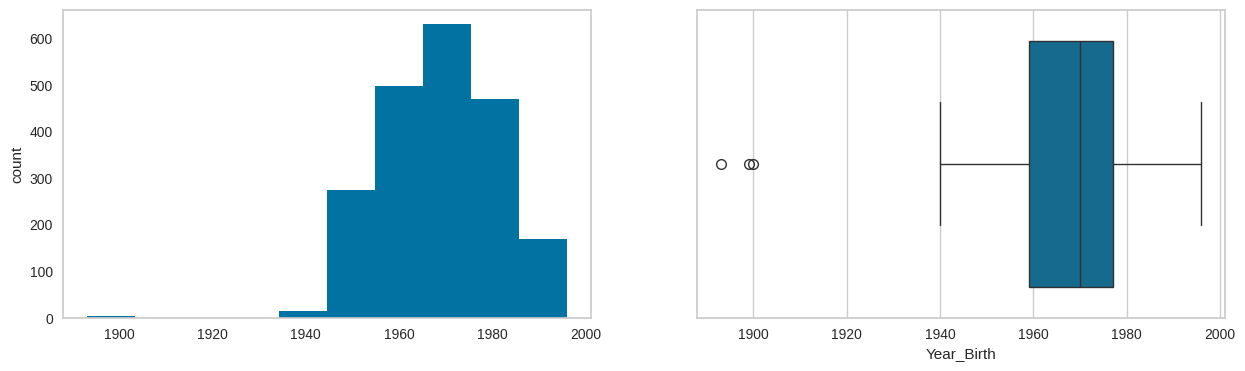

Income
Skew : 7.06


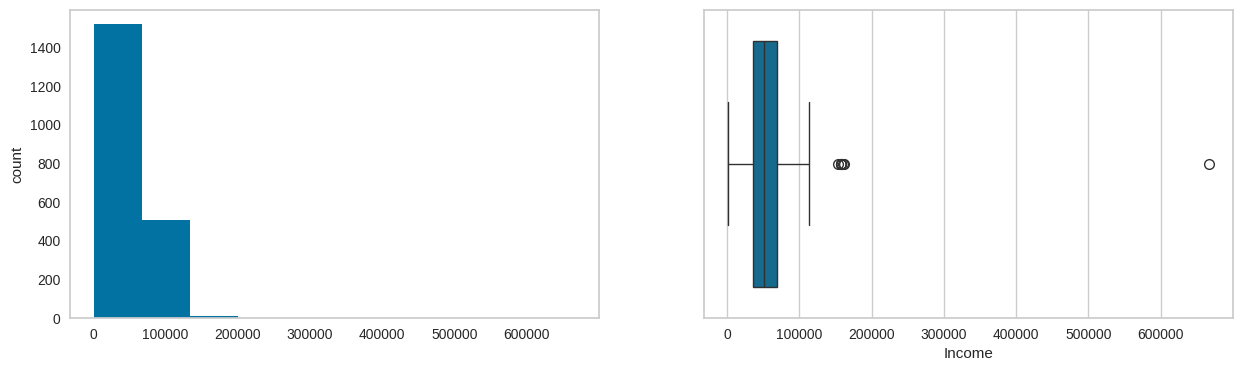

Kidhome
Skew : 0.62


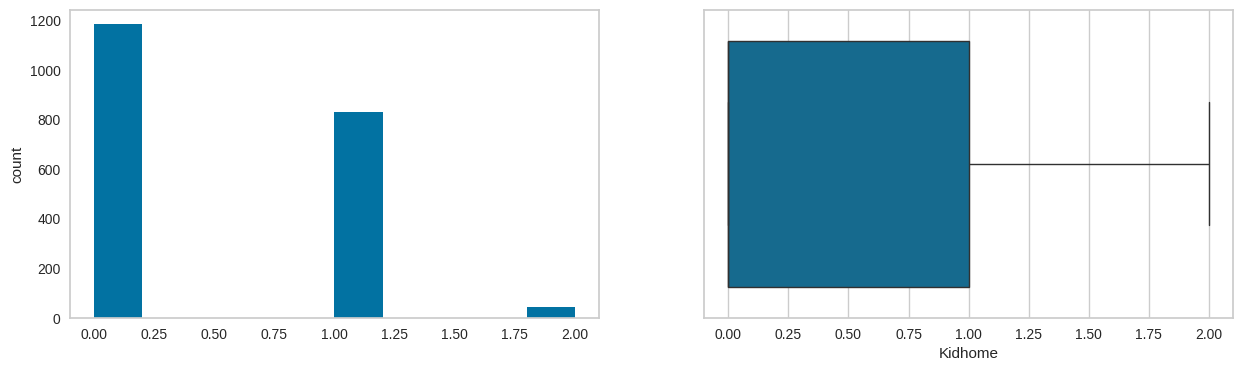

Teenhome
Skew : 0.41


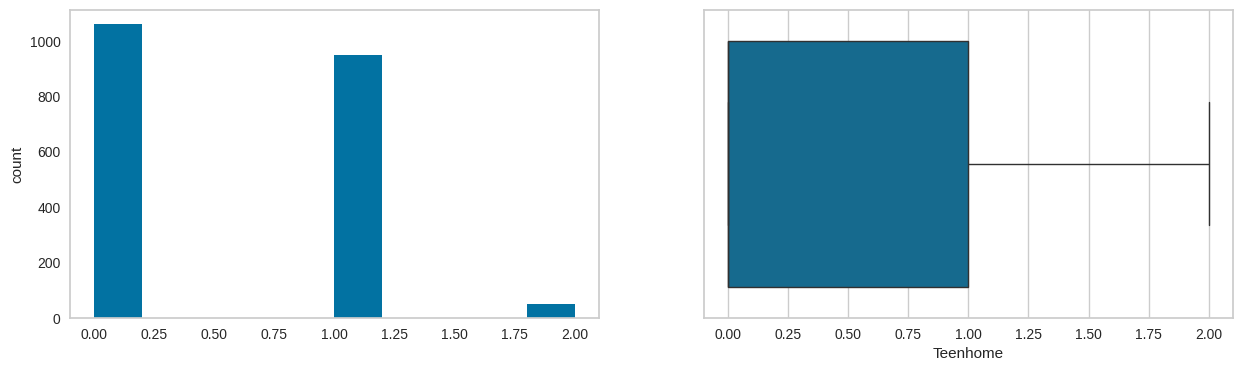

Recency
Skew : 0.0


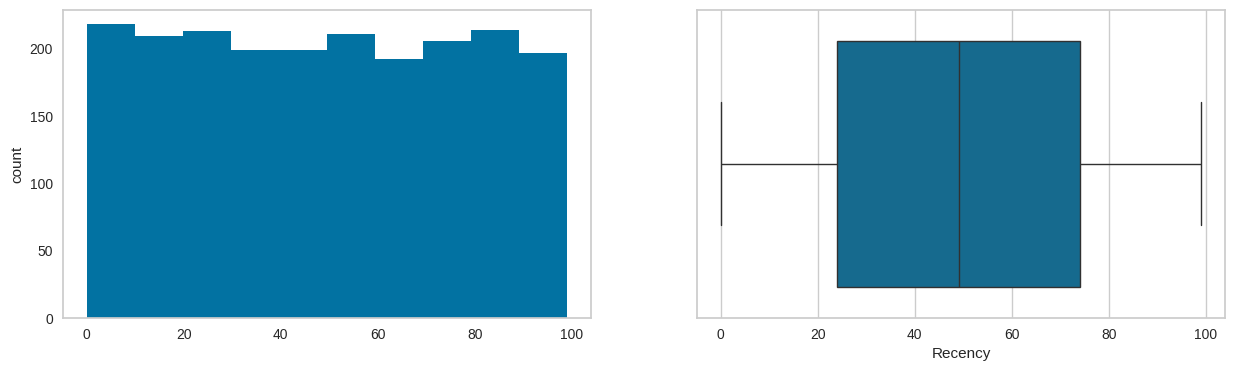

MntWines
Skew : 1.17


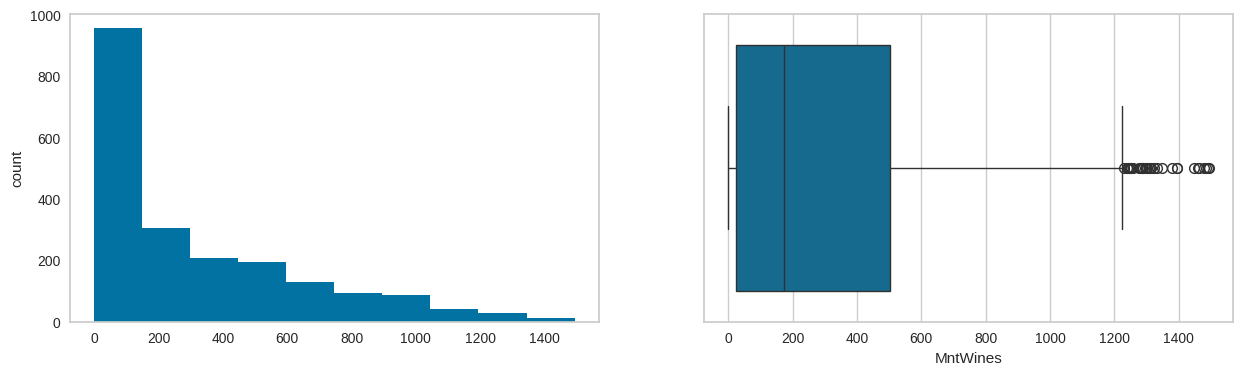

MntFruits
Skew : 2.11


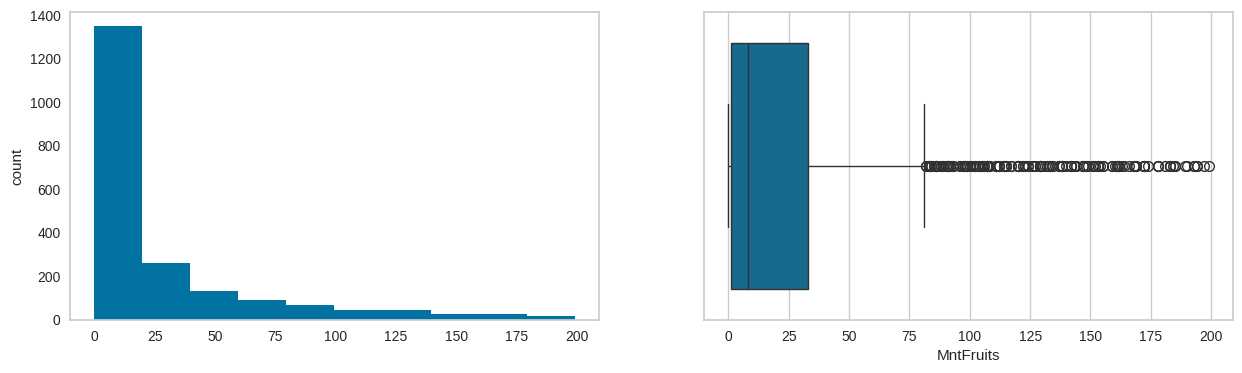

MntMeatProducts
Skew : 2.1


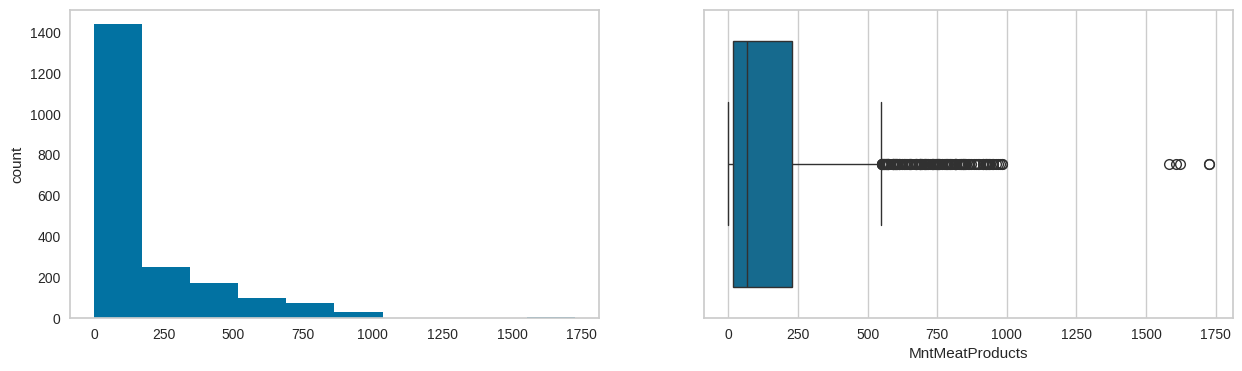

MntFishProducts
Skew : 1.93


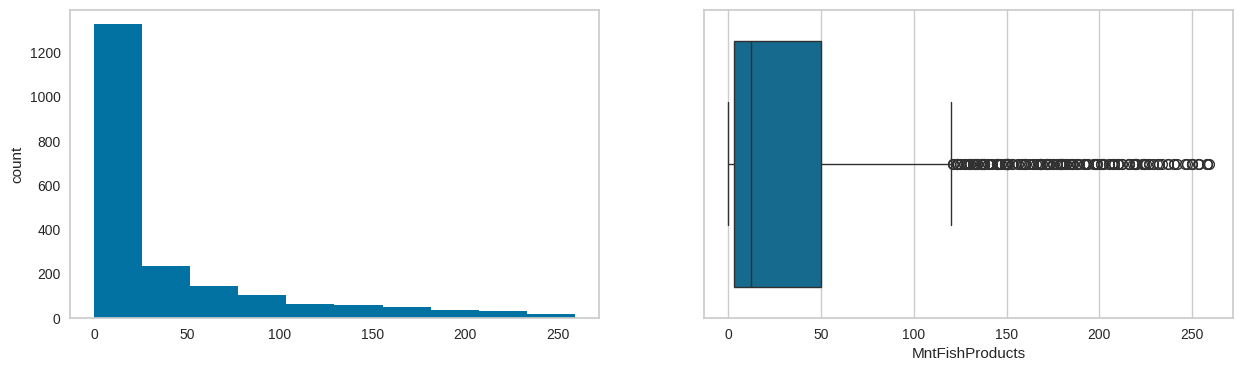

MntSweetProducts
Skew : 2.15


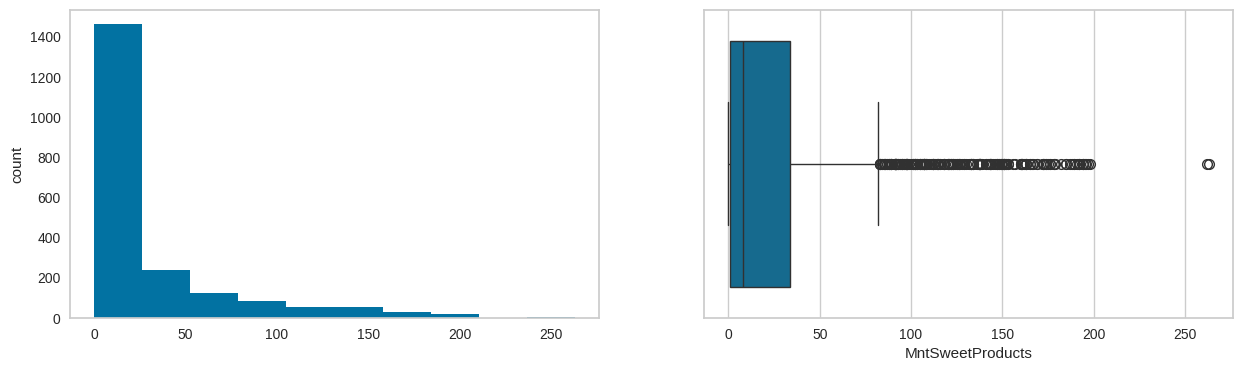

MntGoldProds
Skew : 1.91


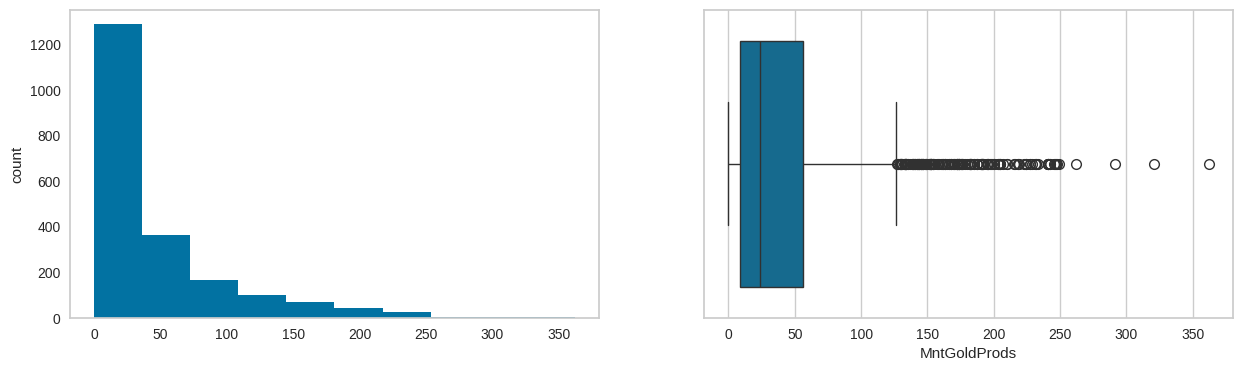

NumDealsPurchases
Skew : 2.44


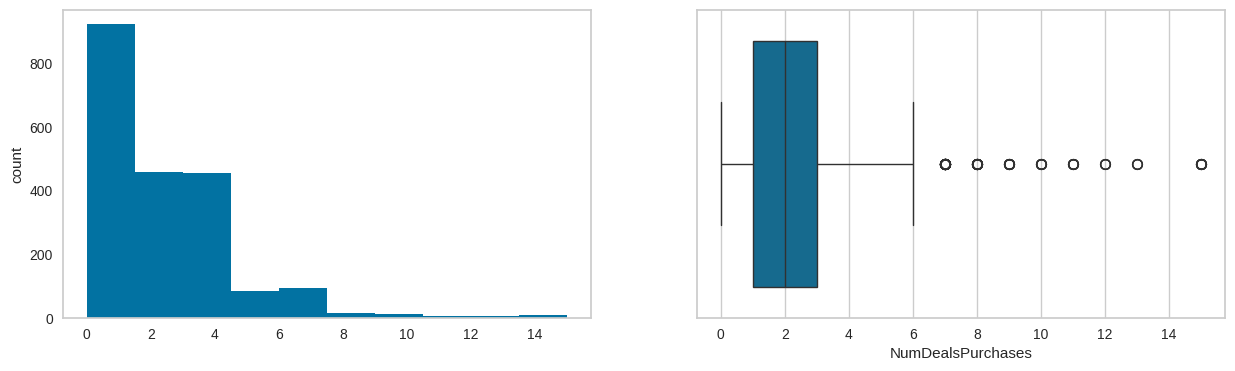

NumWebPurchases
Skew : 1.43


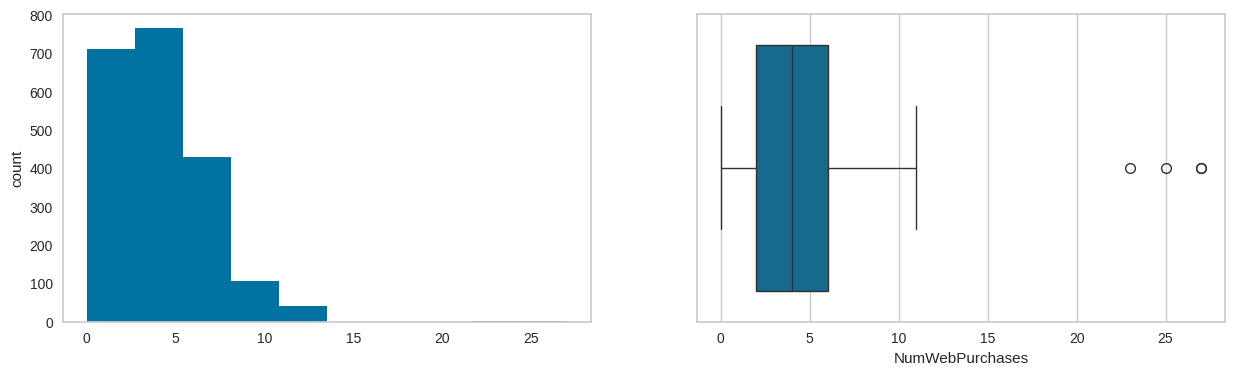

NumCatalogPurchases
Skew : 1.95


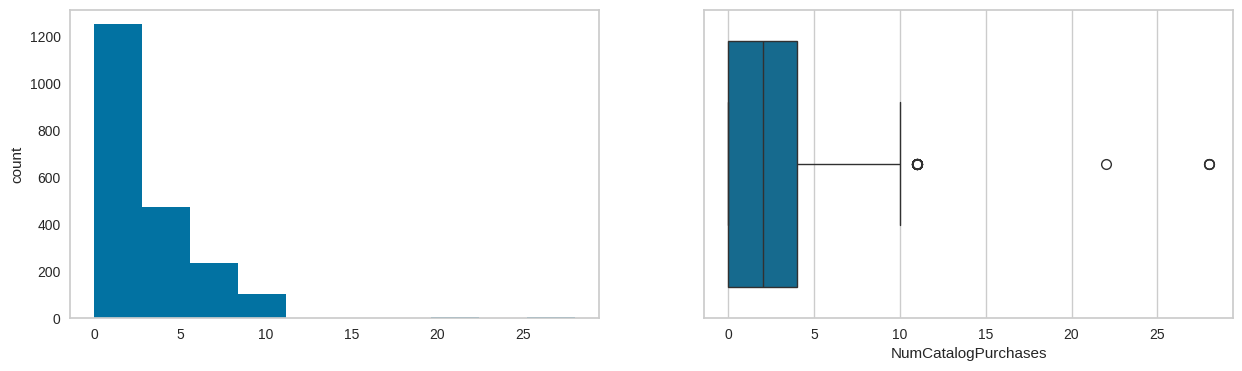

NumStorePurchases
Skew : 0.7


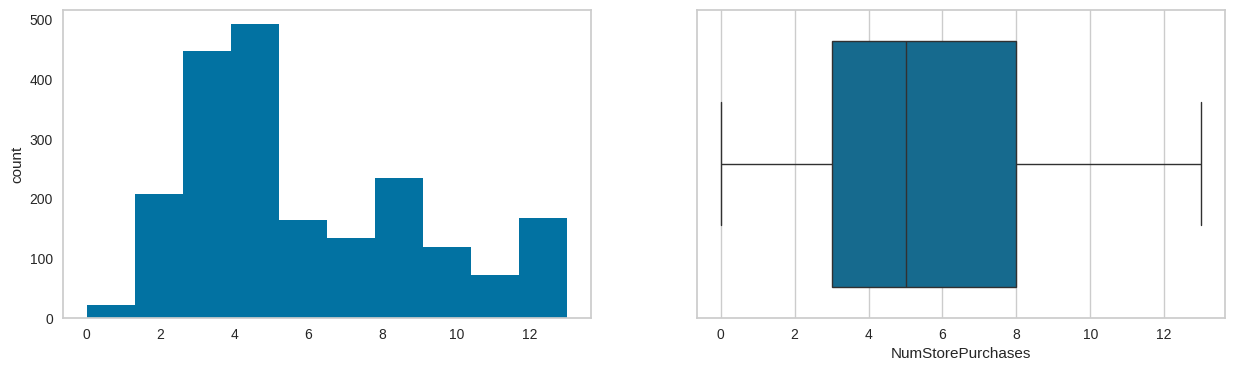

NumWebVisitsMonth
Skew : 0.25


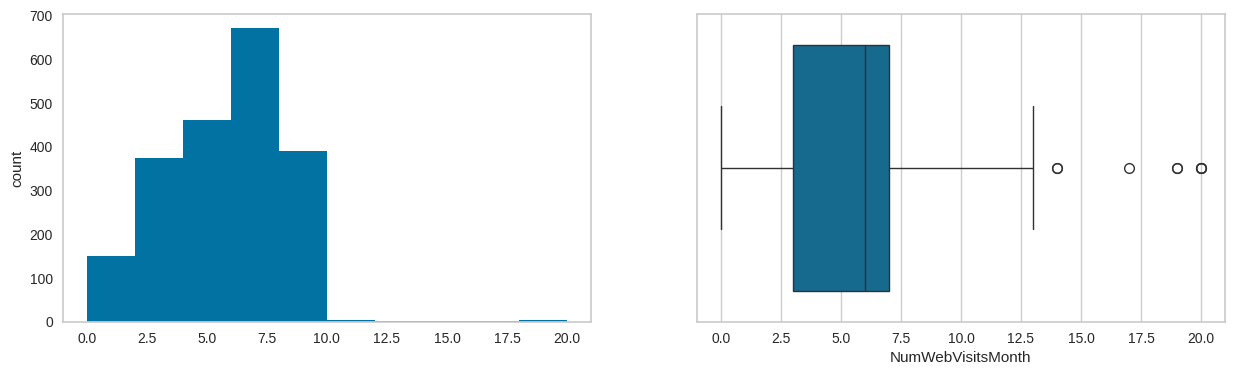

AcceptedCmp3
Skew : 3.27


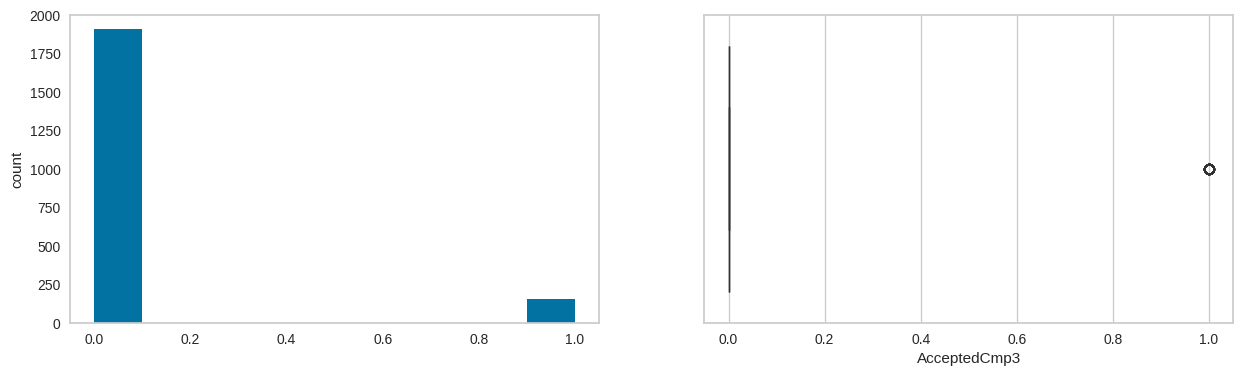

AcceptedCmp4
Skew : 3.18


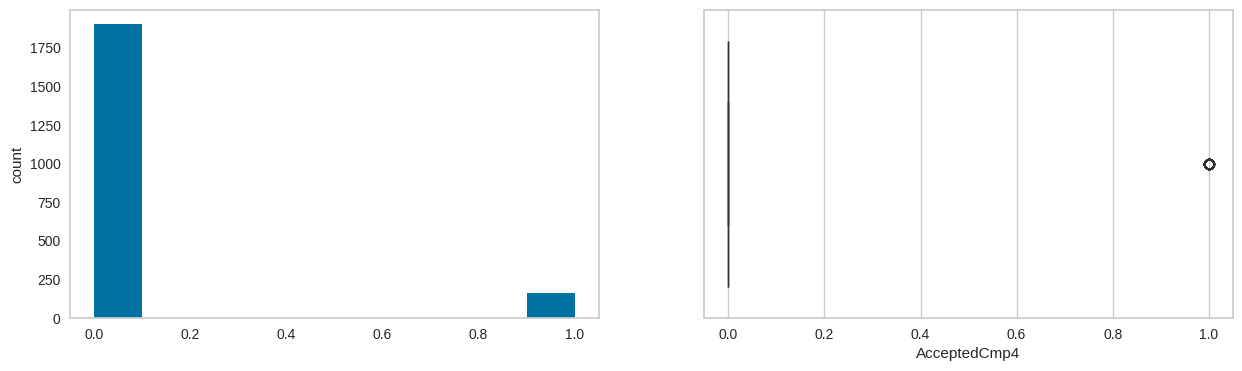

AcceptedCmp5
Skew : 3.32


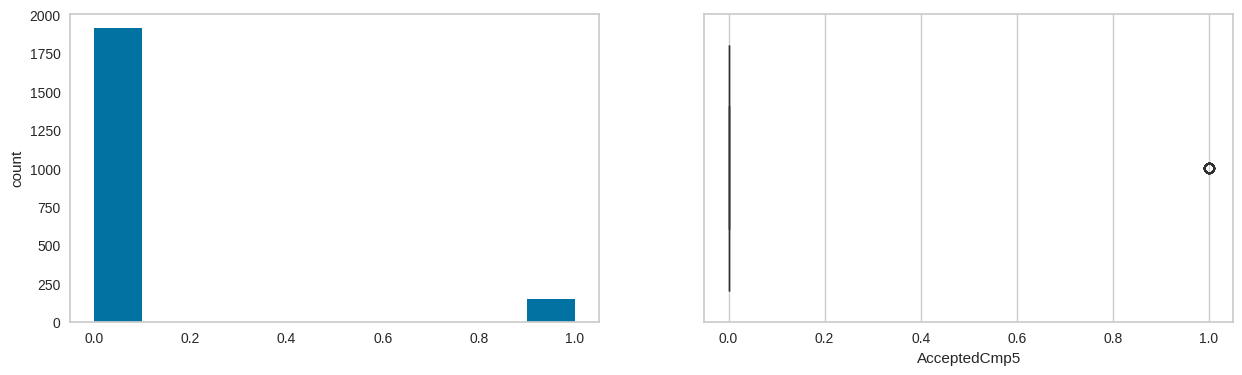

AcceptedCmp1
Skew : 3.51


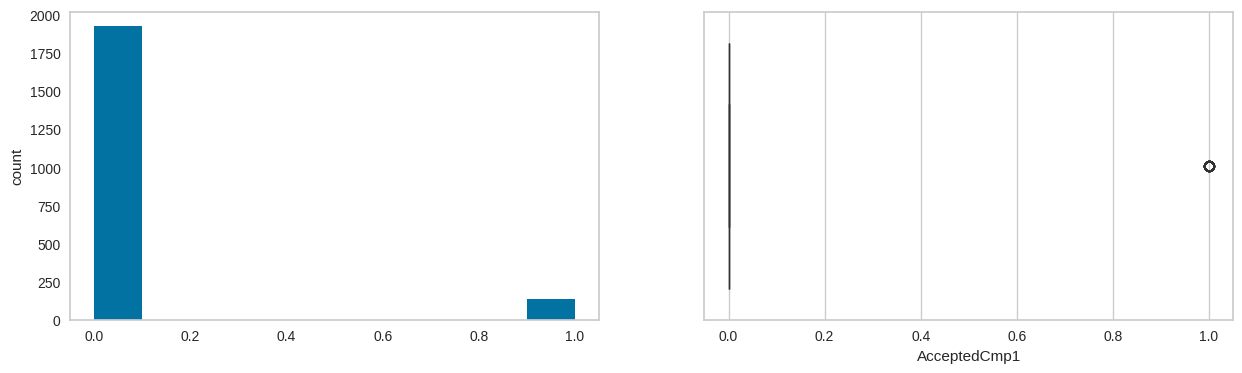

AcceptedCmp2
Skew : 8.73


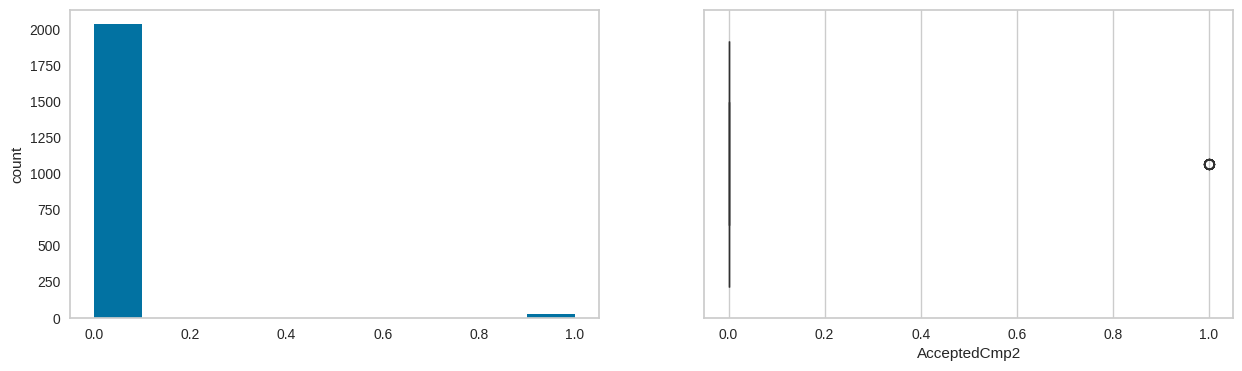

Complain
Skew : 10.0


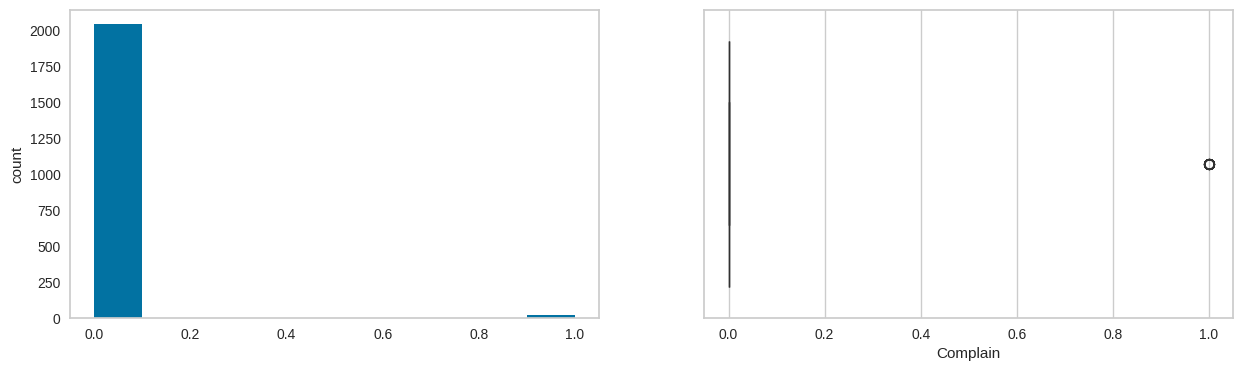

Response
Skew : 1.94


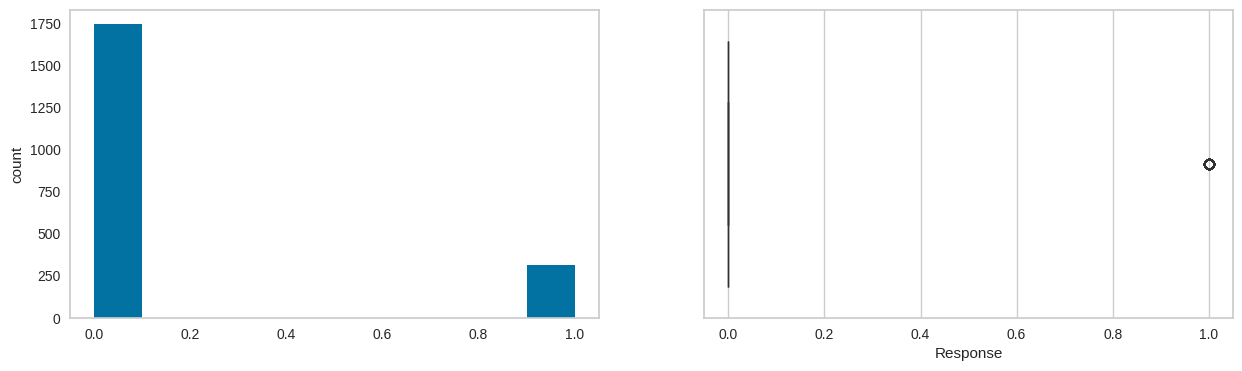

In [17]:
# Write your code here
for col in num_col:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

##### **Observations:**


*  The distribution plot shows that MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds are highly right skew. This can also be observed from their boxplots where many outliers are present.

*   The distribution plot shows that MntMeatProducts, NumCatalogPurchases, NumWebPurchases NumDealsPurchases are right skew.

*   NumStorePurchases, Recency, Teenhome, Kidhome are the only feature variables with zero ouliers.
*   Recency is the only variable that is almost uniformly distributed.

*   AcceptedCmp1 to 5 and Response variabe have a very large proportion of zeros compared to the one of ones. With such a low variance, those variables might not be critical for our analysis.



### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

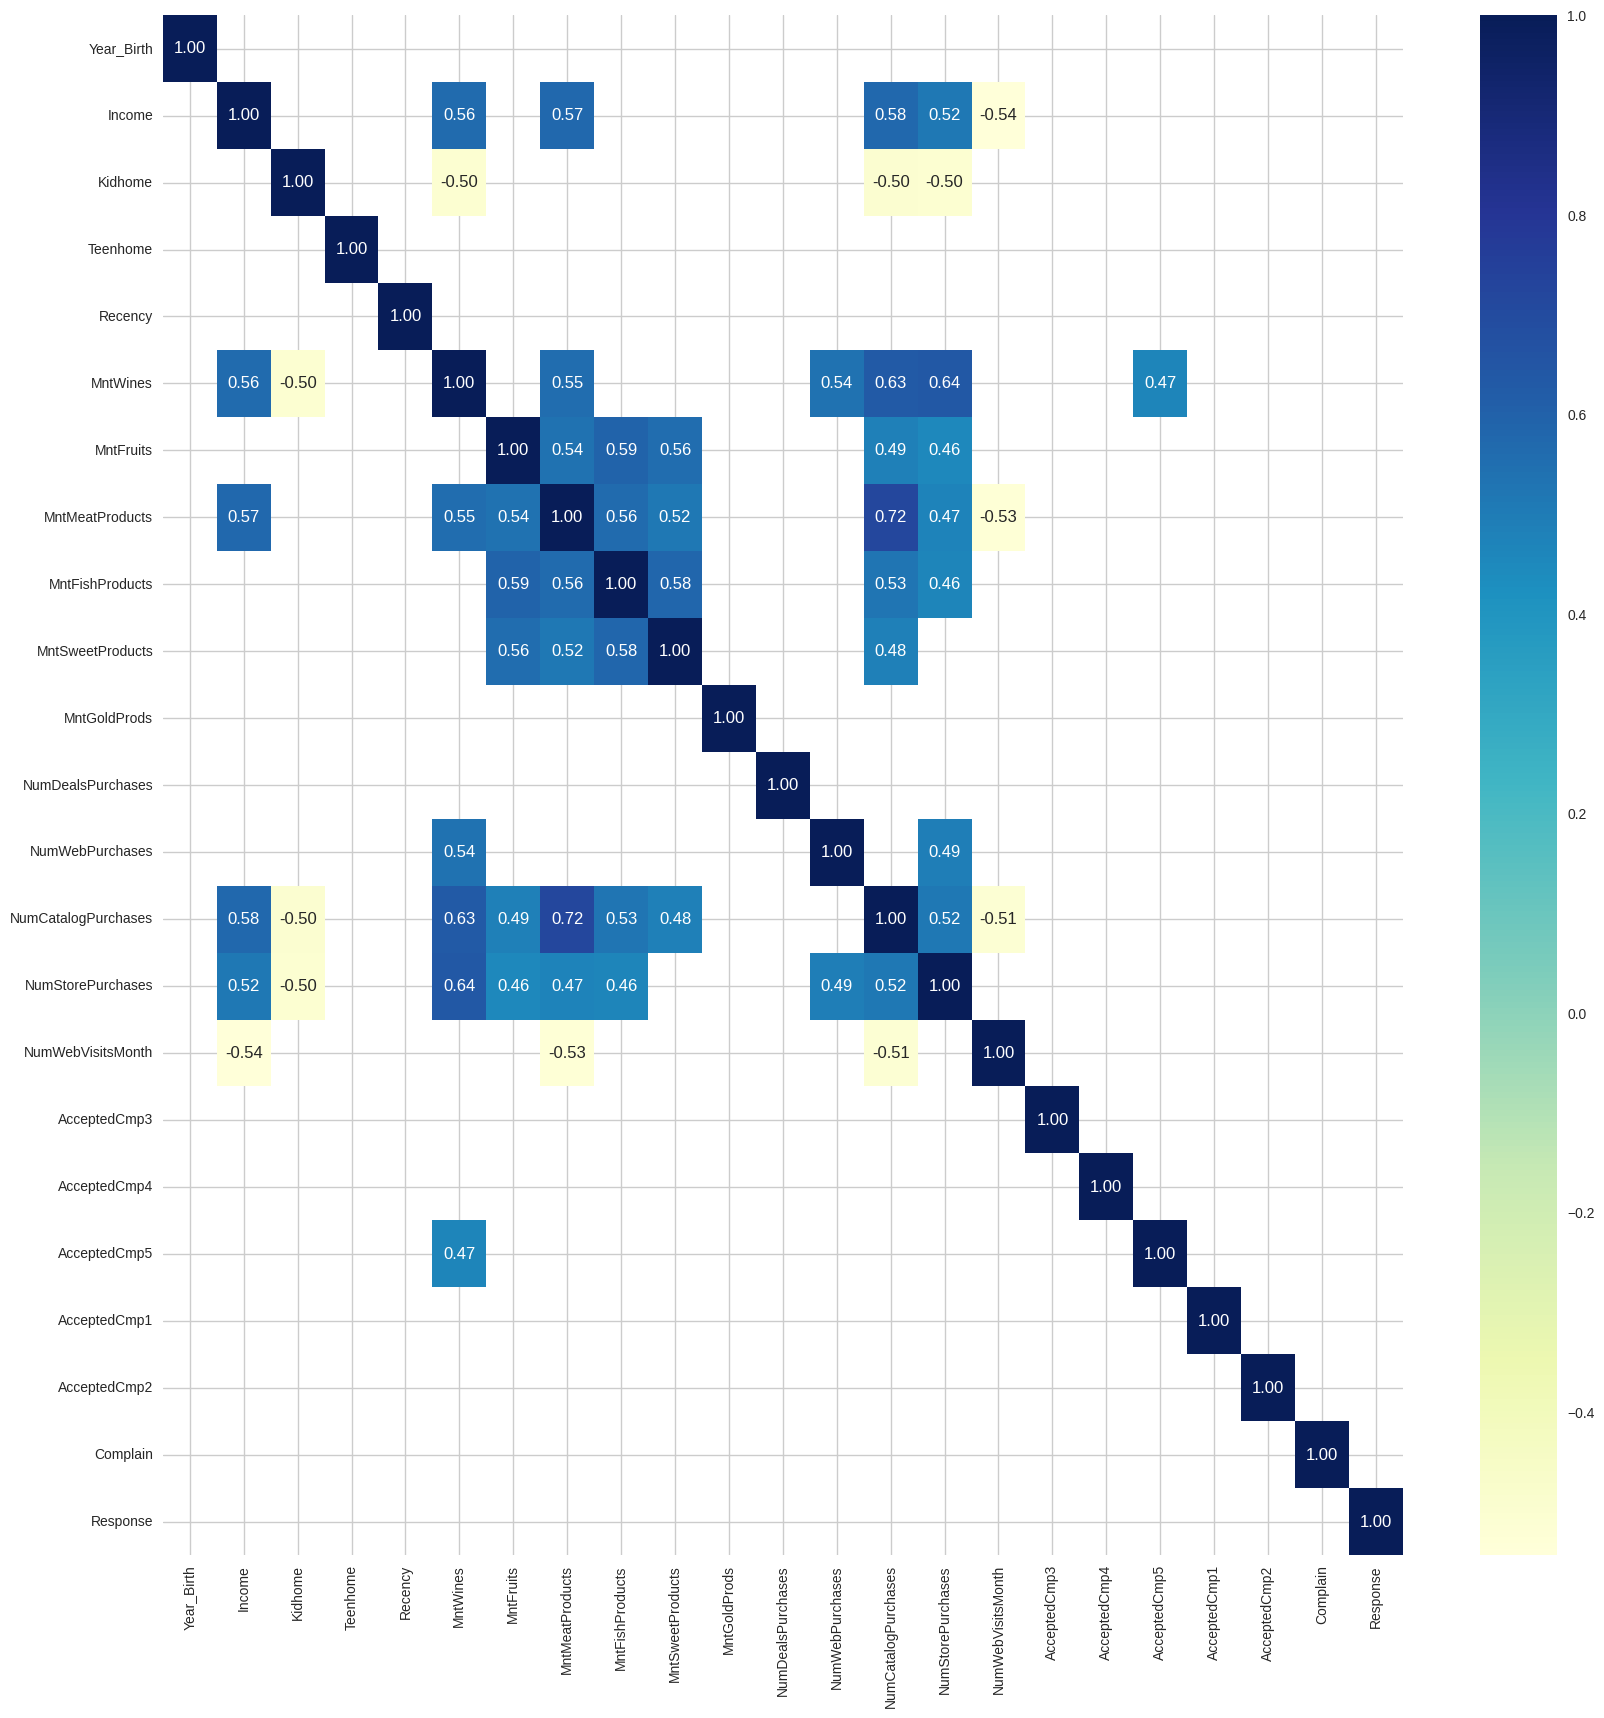

In [18]:
# plotting the correlations diagram
plt.figure(figsize  = (20, 20))

num_cols = data.select_dtypes(include = "number").columns.to_list()

correlations = data[num_cols].corr()

sns.heatmap(correlations[(correlations  >0.45) | (correlations < -0.45)] , annot = True, fmt='0.2f', cmap = "YlGnBu")

plt.show()

##### **Observations:**



*  We can observe strong positive correlation among the following variables:

  1.   NumCatalogPurshases and MntMeatsProducts, suggesting that customer who buy meat products tend to purchase via Catalogs.

*   We can observe moderate positive correlation among the following variables:

  1.   MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurshases and Income, suggesting that customer with higher income tends to buy more wines, meat products and like purchasing  in store and via catalogs.
  2. NumWebPurshases, NumCatalogPurshases, NumStorePurshases, MntMeatProducts and MntWines, suggesting that customer who like to buy wine tend to buy also meat products. Additionally, theses customers tend to buy from  the physical store, the catalog and via the website. The physical store and catalog buying are predominant.
  1.   MntFishProducts, MntSweetProducts, NumStorePurchases, and MntMeatProducts, suggesting that customers who purchase fish, sweet and meat products tends to do it at the physical store.
  2.   MntSwwetProducts, NumCatalogPurchases, NumStorePurchases, and MntFishProducts suggesting that customers who purchase fish, sweet products tend to do it via catalog or at the physical store.

*  We can observe high negative correlation among the following variables:

  1.   NumWebVisitMonth and Income, suggesting that , suggesting that customers with higher income tend to visit less  the company website.
  2.   NumWebVisitsmonth, and MntMeatproducts suggesting that  customers that purchase meat products tends to not go to the company website.
  1.   MntWines, NumCatalogPurchases, NumStorePurshases, and KidHome, suggesting that customers with more kid at home purchase less  wine, and buy less from the physical store as well as catalog.


## **Feature Engineering**

### Education level transformation

In [19]:
data_trans = data.copy()

In [20]:
# Defining the order of education levels
education_levels =["Basic", "Graduation", "2n Cycle", "Master", "PhD"]
data_trans["Education"]= pd.Categorical(data_trans["Education"], categories=education_levels, ordered=True)
data_trans["Education_numeric"]=data_trans["Education"].cat.codes
data_trans.drop(["Education"], axis=1, inplace=True)

In [21]:
data_trans[["Education_numeric"]]

,Education_numeric
0,1
1,1
2,1
3,1
4,4
...,...
2233,1
2235,1
2237,1
2238,3


from matplotlib import pyplot as plt
_df_0['Education_numeric'].plot(kind='hist', bins=20, title='Education_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Education_numeric'].plot(kind='line', figsize=(8, 4), title='Education_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

### Marital Status Transformation

In [22]:
data_trans["Marital_Status"].value_counts()

,count
Marital_Status,
Married,795
Together,521
Single,448
Divorced,216
Widow,71
Alone,3
Absurd,2
YOLO,2


In [23]:
# Curating the marital_status column for consitency
data_trans.replace(["Absurd", "YOLO"], "Unknown", inplace=True)
data_trans.replace("Alone", "Single", inplace=True)
data_trans.replace("Together", "Married", inplace=True)
data_trans["Marital_Status"].unique()

array(['Single', 'Married', 'Divorced', 'Widow', 'Unknown'], dtype=object)

In [24]:
# transforming marital status into numeric
categorical =data_trans.select_dtypes(include="object")
one_hot_encoding = pd.get_dummies(categorical["Marital_Status"])
data_trans = pd.concat([data_trans, one_hot_encoding],axis=1)
data_trans.drop(["Marital_Status"], axis=1, inplace = True)

In [25]:
one_hot_encoding

,Divorced,Married,Single,Unknown,Widow
0,False,False,True,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
2233,False,True,False,False,False
2235,False,True,False,False,False
2237,True,False,False,False,False
2238,False,True,False,False,False


### Dropping some variable that might not be relevant for our analysis

In [26]:
# Dropping variables with very low variance
data_trans.drop(["AcceptedCmp1"], axis=1, inplace=True)
data_trans.drop(["AcceptedCmp2"], axis=1, inplace=True)
data_trans.drop(["AcceptedCmp3"], axis=1, inplace=True)
data_trans.drop(["AcceptedCmp4"], axis=1, inplace=True)
data_trans.drop(["AcceptedCmp5"], axis=1, inplace=True)
data_trans.drop(["Response"], axis=1, inplace=True)

### Dt_Customer variable transformation into numeric

In [27]:
# Converting date to numeric
data_trans["Dt_Customer"]=pd.to_datetime(data_trans["Dt_Customer"], format="%d-%m-%Y").astype(int)

### Imputation of the Income variable

In [28]:
# printing the missing values
print(data_trans["Income"][data_trans["Income"].isnull()]), data_trans["Income"][data_trans["Income"].isnull()].shape[0]

10     NaN
27     NaN
43     NaN
48     NaN
58     NaN
71     NaN
90     NaN
91     NaN
92     NaN
128    NaN
133    NaN
312    NaN
319    NaN
1379   NaN
1382   NaN
1383   NaN
1386   NaN
2059   NaN
2061   NaN
2078   NaN
2079   NaN
2081   NaN
2084   NaN
2228   NaN
Name: Income, dtype: float64


(None, 24)

Replacing missing value by Income median to keep the original distribution (right skew) of the Income.

In [29]:
# Impute the data by its median value
data_imputed = data_trans.copy()
data_imputed["Income"]= data_imputed["Income"].fillna(data_imputed["Income"].median())
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2058 non-null   int64  
 1   Income               2058 non-null   float64
 2   Kidhome              2058 non-null   int64  
 3   Teenhome             2058 non-null   int64  
 4   Dt_Customer          2058 non-null   int64  
 5   Recency              2058 non-null   int64  
 6   MntWines             2058 non-null   int64  
 7   MntFruits            2058 non-null   int64  
 8   MntMeatProducts      2058 non-null   int64  
 9   MntFishProducts      2058 non-null   int64  
 10  MntSweetProducts     2058 non-null   int64  
 11  MntGoldProds         2058 non-null   int64  
 12  NumDealsPurchases    2058 non-null   int64  
 13  NumWebPurchases      2058 non-null   int64  
 14  NumCatalogPurchases  2058 non-null   int64  
 15  NumStorePurchases    2058 non-null   int64 

### Scaling the Data

In [30]:
#num_cols = data_imputed.select_dtypes(include = "number").columns.to_list()
scaler = StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)
data_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_numeric,Divorced,Married,Single,Unknown,Widow
0,-0.984645,0.228201,-0.829097,-0.932051,-1.536426,0.312088,0.984044,1.554193,1.657389,2.464511,1.458453,0.846738,0.340203,1.394889,2.502177,-0.546780,0.688830,-0.099063,-0.825498,-0.342438,-1.331760,1.887642,-0.04413,-0.18903
1,-1.235251,-0.236649,1.031625,0.898255,1.184795,-0.377754,-0.870634,-0.634978,-0.708461,-0.646539,-0.627684,-0.726738,-0.174604,-1.107885,-0.566237,-1.164383,-0.131073,-0.099063,-0.825498,-0.342438,-1.331760,1.887642,-0.04413,-0.18903
2,-0.316363,0.759307,-0.829097,-0.932051,0.200208,-0.791659,0.362846,0.572841,-0.178335,1.348193,-0.148113,-0.035944,-0.689411,1.394889,-0.225302,1.306029,-0.541024,-0.099063,-0.825498,-0.342438,0.750886,-0.529761,-0.04413,-0.18903
3,1.270808,-1.013030,1.031625,-0.932051,1.056155,-0.791659,-0.870634,-0.559489,-0.647124,-0.500137,-0.579727,-0.745927,-0.174604,-0.750346,-0.907172,-0.546780,0.278878,-0.099063,-0.825498,-0.342438,0.750886,-0.529761,-0.04413,-0.18903
4,1.020202,0.234310,1.031625,-0.932051,0.947307,1.553804,-0.389131,0.421863,-0.217766,0.158674,-0.004241,-0.554040,1.369817,0.322272,0.115633,0.070823,-0.131073,-0.099063,1.522095,-0.342438,0.750886,-0.529761,-0.04413,-0.18903


In [52]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

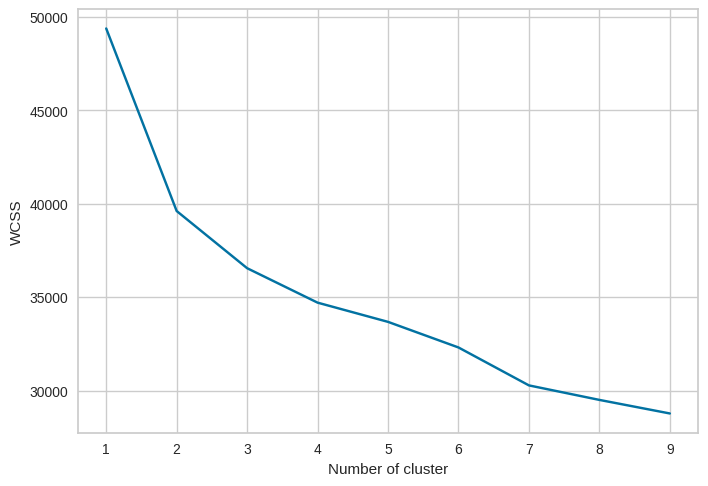

In [53]:
# Write your code here
WCSS = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    WCSS[k] = kmeans.inertia_

# Elbow Plot
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()


##### **Observations:**



*  It think that the appropriate number of clusters is 3.



#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

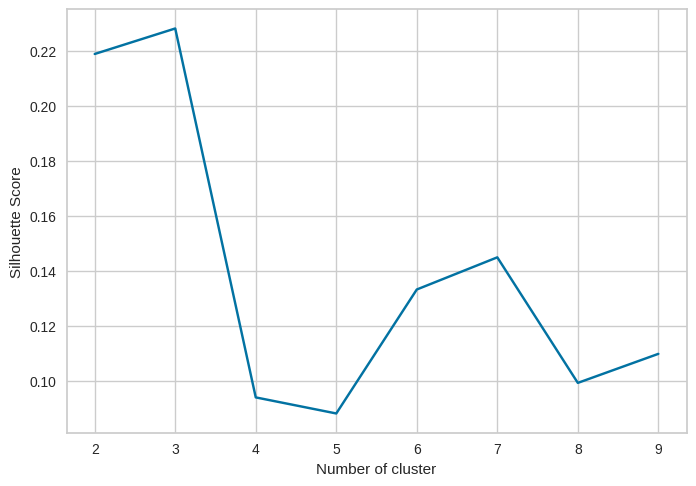

In [54]:
# Write your code here
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

##### **Observations:**



* The number is still 3.



#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [67]:
# Write your code here
import time
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
s_time = time.time()
kmeans.fit(data_scaled)
print(f"Fitting time : {time.time()-s_time} second")

#Adding predicted labels to the original data and scaled data
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)
data_imputed['Labels'] = kmeans.predict(data_scaled)

Fitting time : 0.008774518966674805 second


##### **Observations:**



*  It takes 0.008 second to fit the data.



## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [56]:
data_scaled_copy.Labels.value_counts()

,count
Labels,
2,954
1,571
0,533


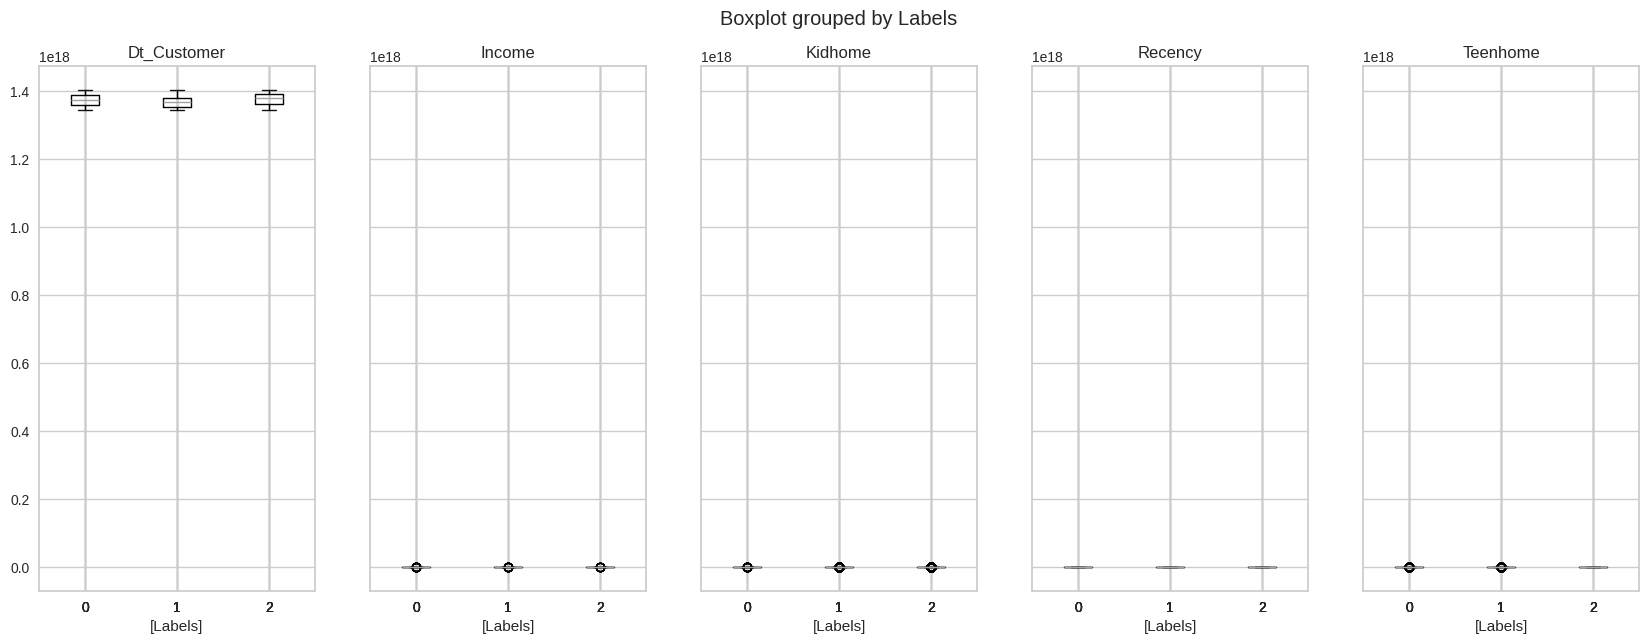

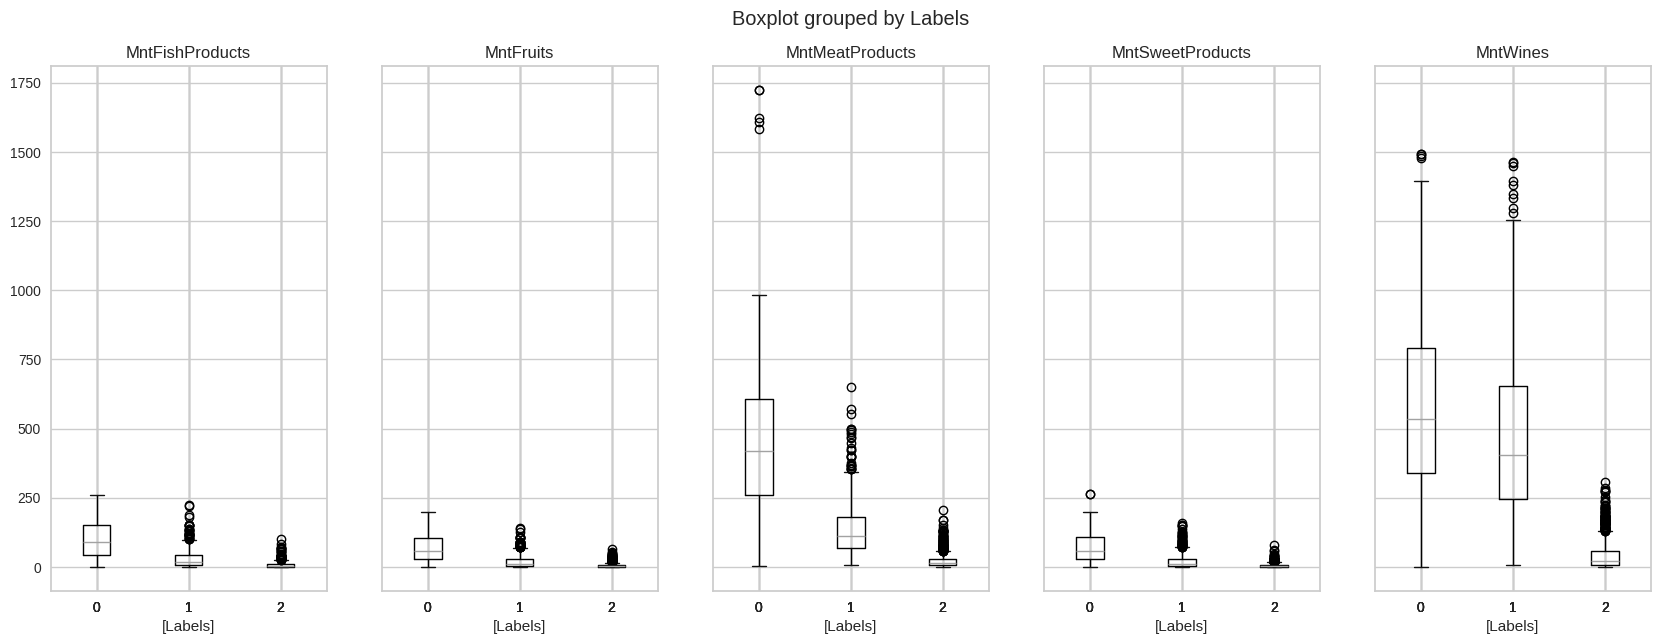

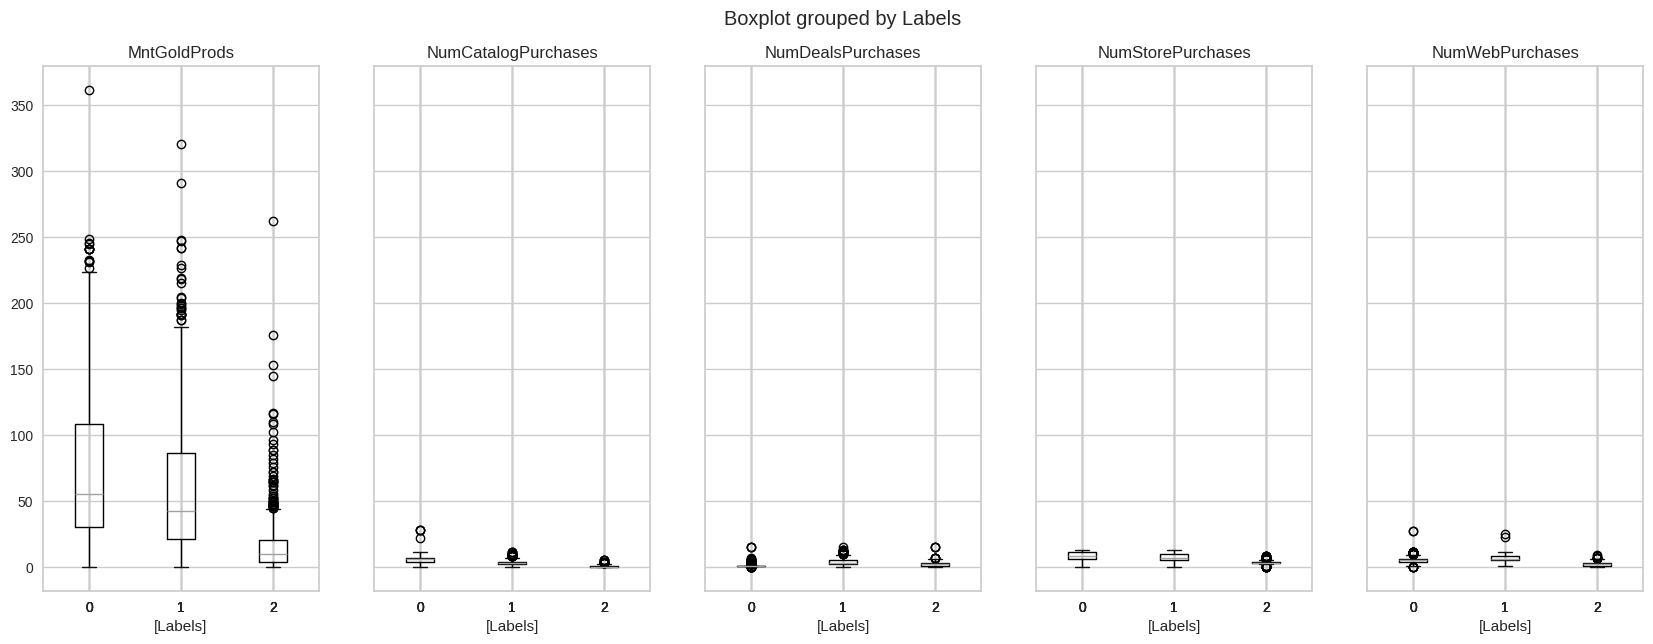

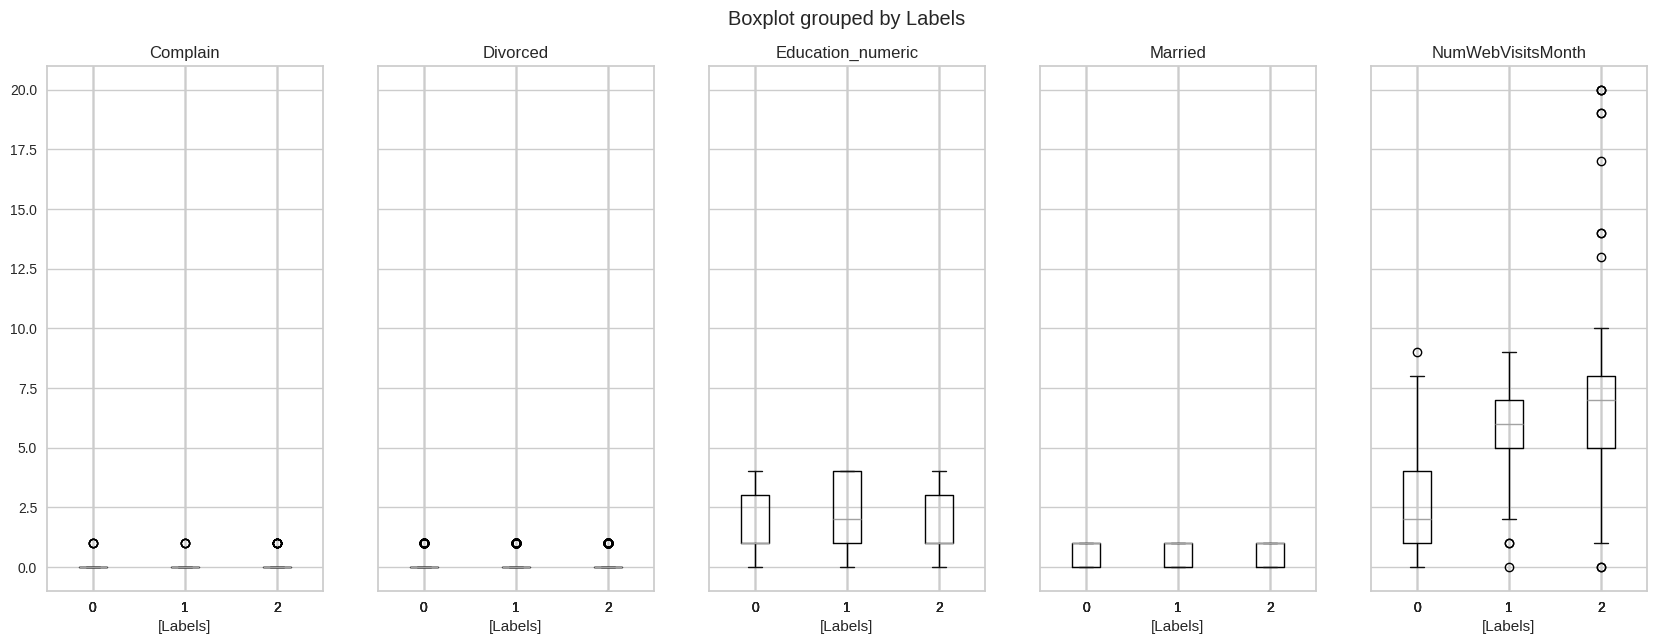

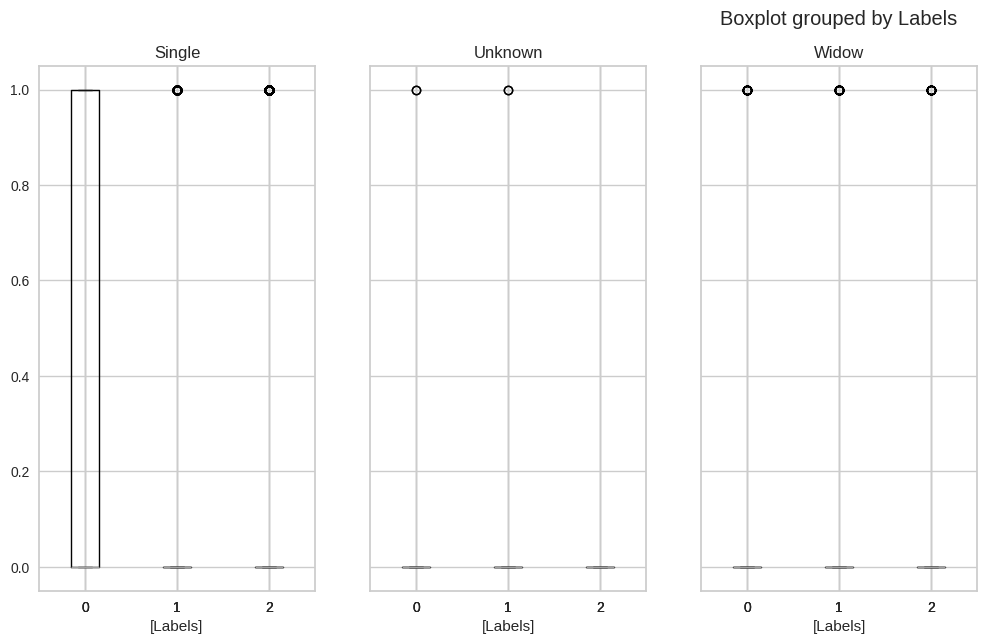

In [84]:
# Write your code here
# Visualizing via boxplots different features w.r.t K-means labels
n_count = len(data_imputed.columns.to_list())-1
for k in range(0, n_count, 5):
  temp_data = data_imputed.iloc[:, k:k+5 if k+5 < n_count else n_count]
  temp_data["Labels"]= data_imputed.Labels
  temp_data.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
  plt.show()

##### **Observations:**

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

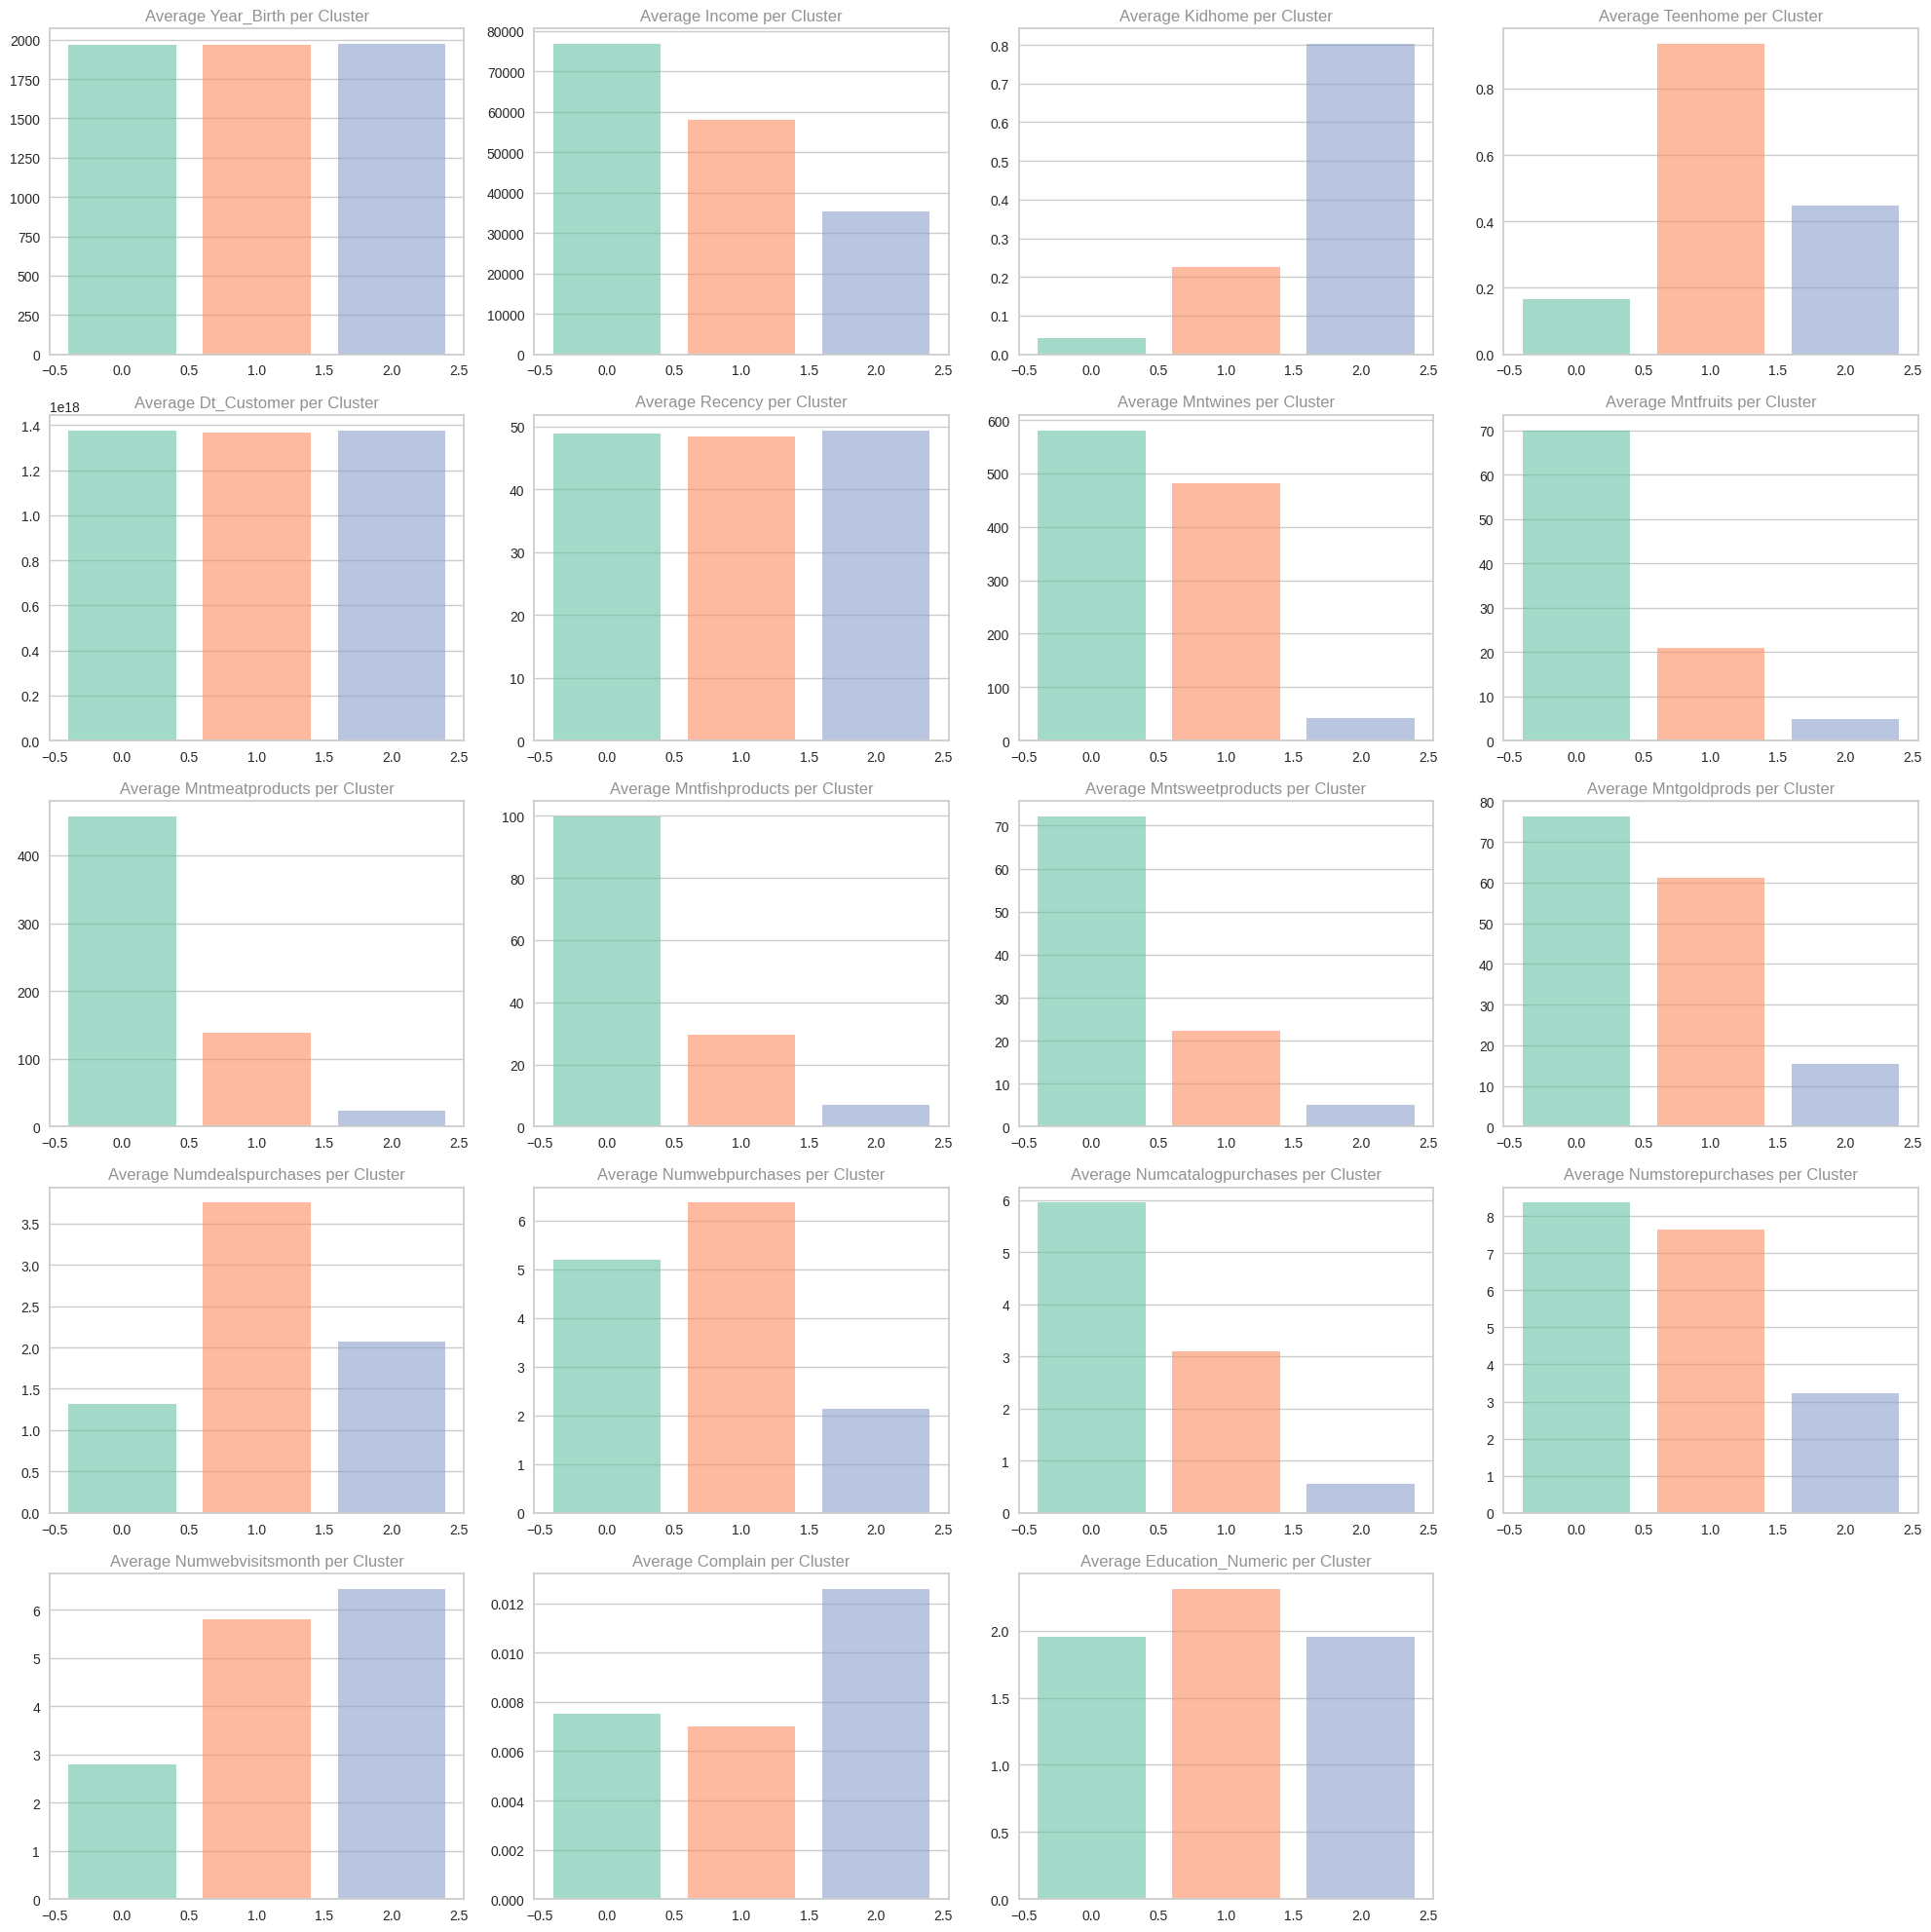

In [87]:
# Write your code here
# Visualizing via barplot different features w.r.t K-means labels
num_cols = data_imputed.select_dtypes(include = "number").columns.to_list()
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(num_cols):
  if column == "Labels":
    continue
  df_plot = data_imputed.groupby("Labels")[column].mean()
  ax = fig.add_subplot(5, 4, i+1)
  ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set2'), alpha=0.6)
  ax.set_title(f"Average {column.title()} per Cluster", alpha=0.5)
  ax.xaxis.grid(False)
plt.tight_layout()
plt.show()

##### **Observations:**


* Cluster 0 - higher income Customers: This cluster represent customers with higher income. They have the lowest number of kid and teenage at home. They spend far more on wine, follows by meat and fish products  than the other class of customers, and tend not to purchase via discount. They mainly prefer purchase  via physical store, following by catalog and lastly via the company website.
* Cluster 1 - medium income Customers: These cluster represents customers with medium Income. They have the highest educated among all the group, attending a 2 cycle on average. They mainly prefer buying wine, follows by gold products and achieve that by visiting the  physical store, follows by the web, catalogs. They are also very keen to purchase via discount.
* Cluster 2 - low income Customers: This cluster represents customers with low income. They have the highest number of teenage at home and prefer buying gold products in store and online. They visited the most the company website last month, and fire the majority of the complains.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

I recommend to the company to have 3 differents marketing campaing. One tailored for the higher income customer, another one of the medium income customer, and the last one for the low income custoners.
1.   For the higher income customers, the company should focus on providing and advertising them a variety of wine, meat and fish products at the physical store, in the catalog and also on their online store.  
2. For the medium income customers, the company should focus on providing and advertising them wine and gold products at exclusive discount price in the physical store, and online as well.
1. For the low income customers, the company should first try the main reason of this higher number of complains. Then, they should provide and advertise to them gold products at the physical store and online.